In [3]:
# Instalar os pacotes.
# !pip install tensorflow
# !pip install keras
# !pip install scikit-optimize

In [5]:
# Importação dos pacotes.
import pickle
import pandas as pd
from funcoes_ajuda import descritiva, relatorio_missing, diagnóstico, avalia_clf
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Importar a base (já tratada).
titanic = pd.read_pickle('/root/MBA_USP_Data_Science_Analytics/11. Árvores, Redes e Ensemble Models/Dados/aula4_titanic1.pkl')
titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [7]:
# Checar rapidamente a base, tipos de dados e missing.
titanic.info()
relatorio_missing(titanic)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   sex_male    891 non-null    bool   
 7   embarked_Q  891 non-null    bool   
 8   embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
Número de linhas: 891 | Número de colunas: 9


,Pct_missing,Freq_missing
survived,0.0%,0
pclass,0.0%,0
age,0.0%,0
sibsp,0.0%,0
parch,0.0%,0
fare,0.0%,0
sex_male,0.0%,0
embarked_Q,0.0%,0
embarked_S,0.0%,0


In [8]:
# Definindo a lista de features.
variaveis = list(titanic.columns)
vResp = 'survived'

print(variaveis)
print(vResp)

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']
survived


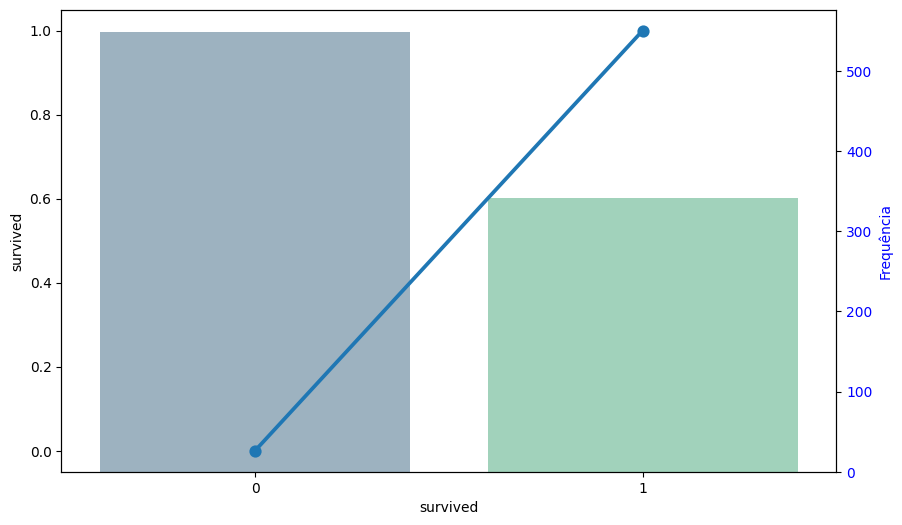

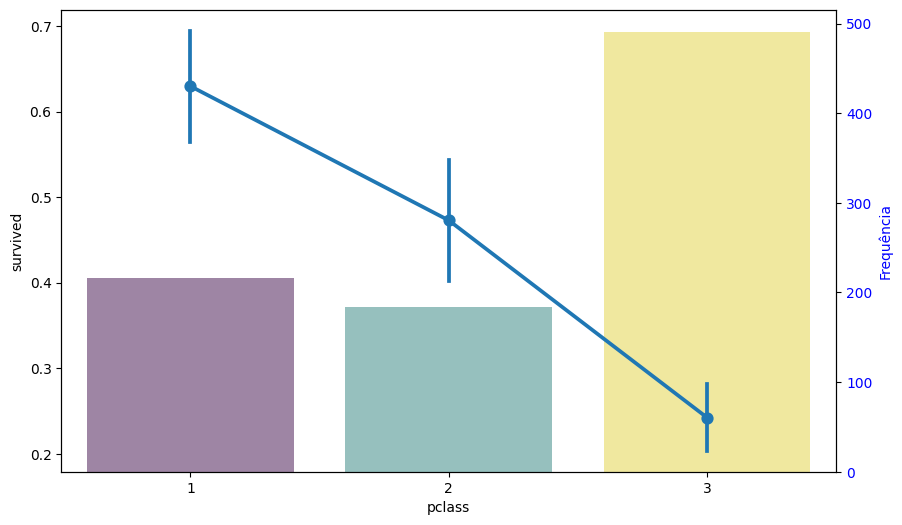

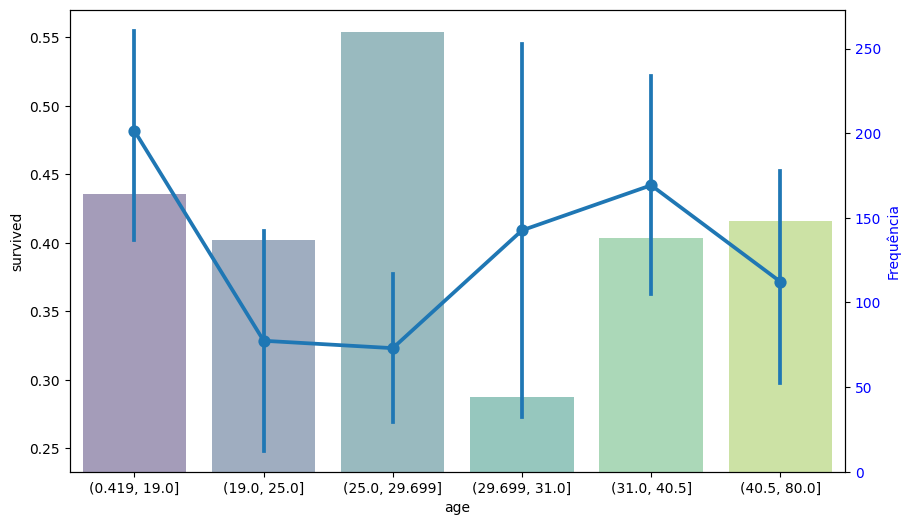

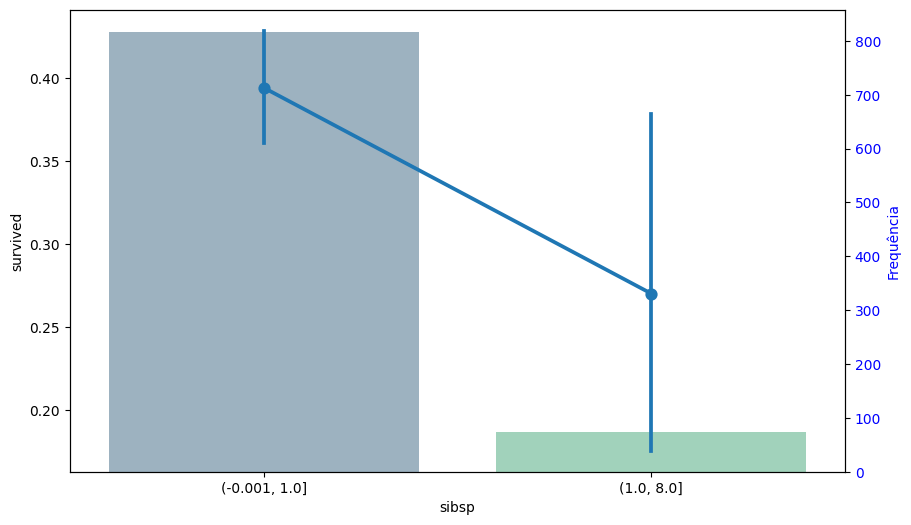

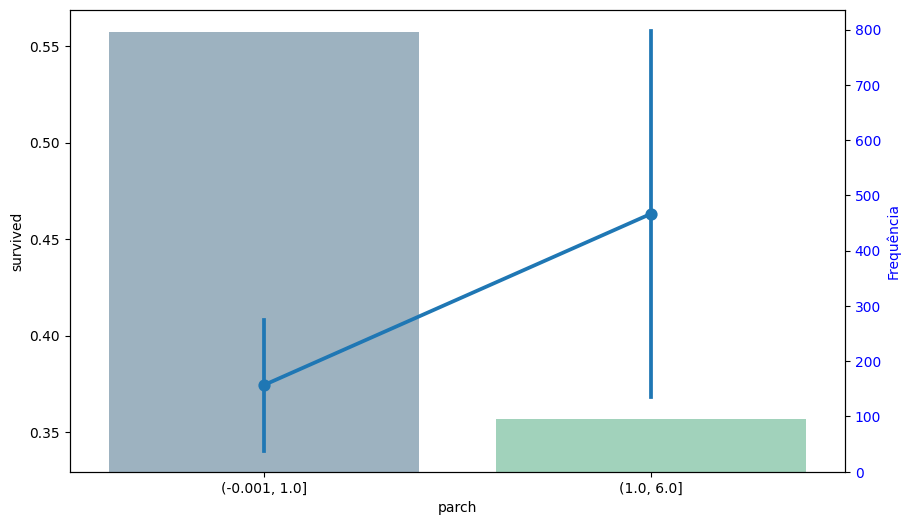

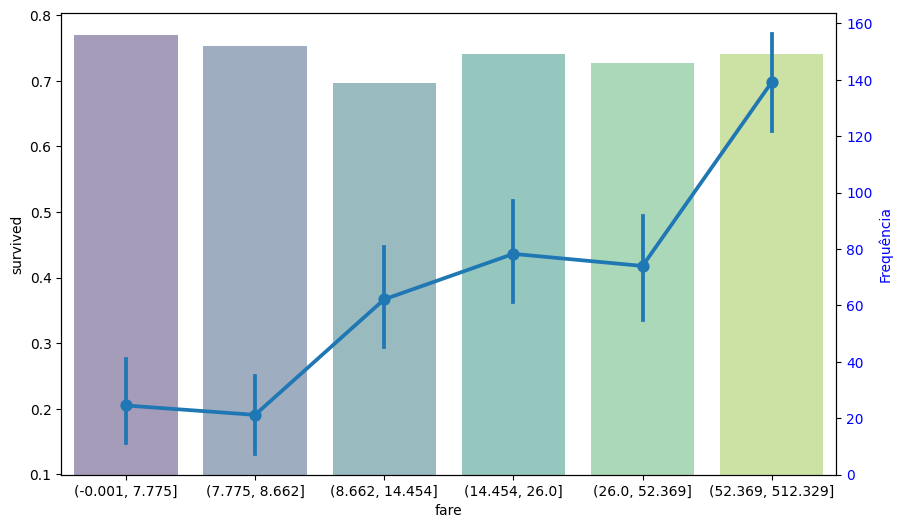

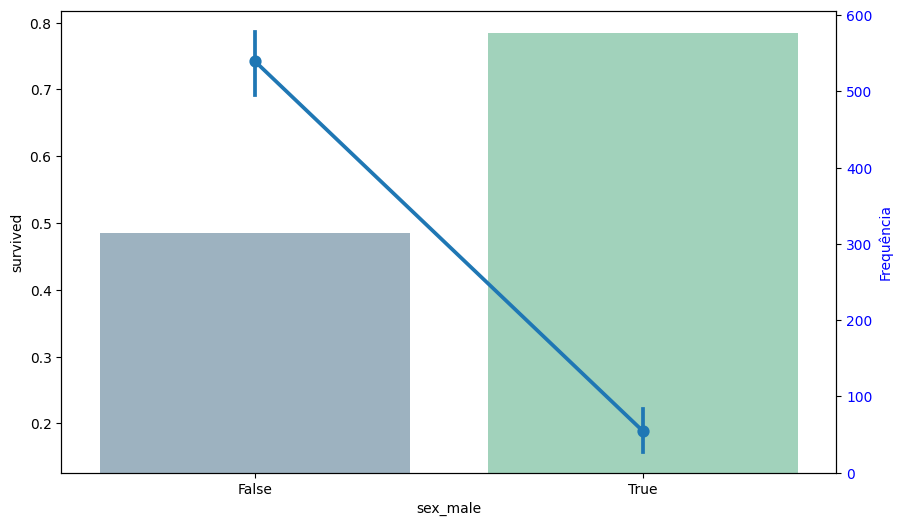

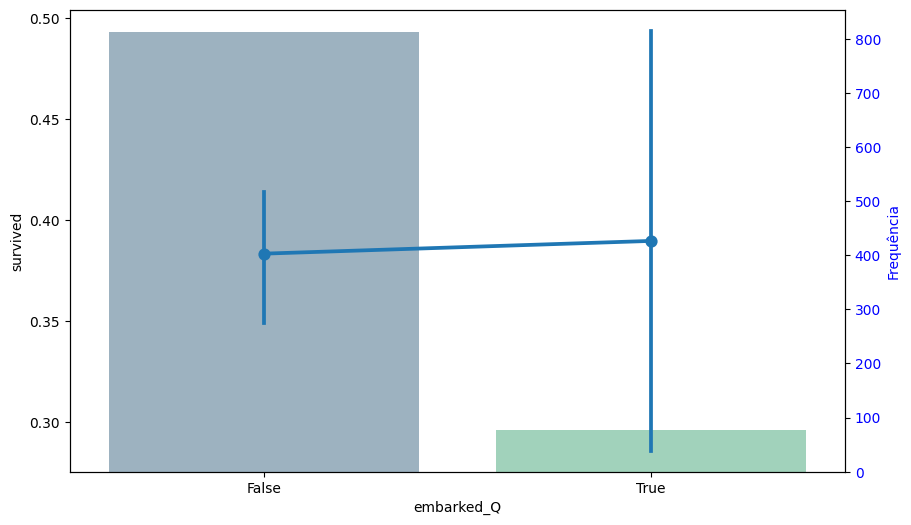

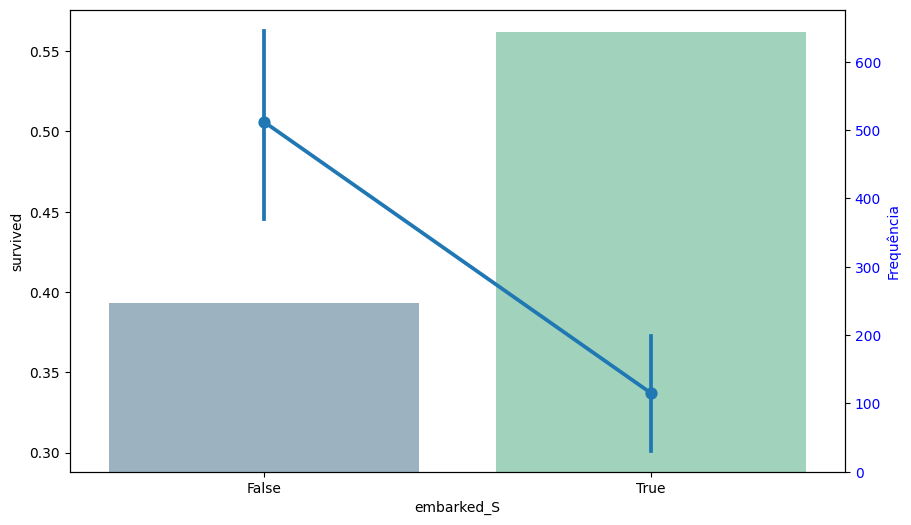

In [9]:
# A análise descritiva é sempre um passo muito importante.
for var in variaveis:
    descritiva(titanic, var, vResp, 6)

In [10]:
# Dividir a base em treino e teste.
X = titanic[variaveis]
y=titanic[vResp]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1729)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(668, 9) (668,) (223, 9) (223,)


In [11]:
# Construindo a primeira árvore.
arvore1 = DecisionTreeClassifier()
arvore1.fit(X_train, y_train)

DecisionTreeClassifier()


Base de treino:
A acurácia da árvore é: 100.0%
A acurácia balanceada da árvore é: 100.0%
AUC-ROC: 100.00%
GINI: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       1.00      1.00      1.00       257

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668



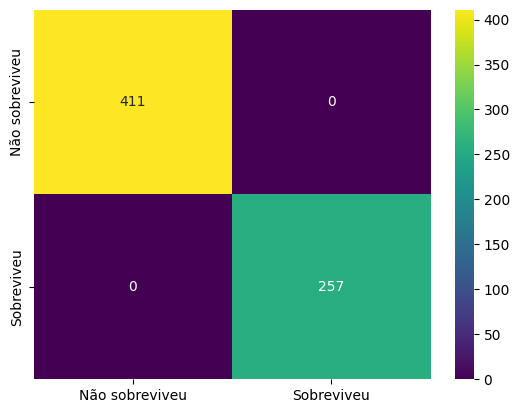

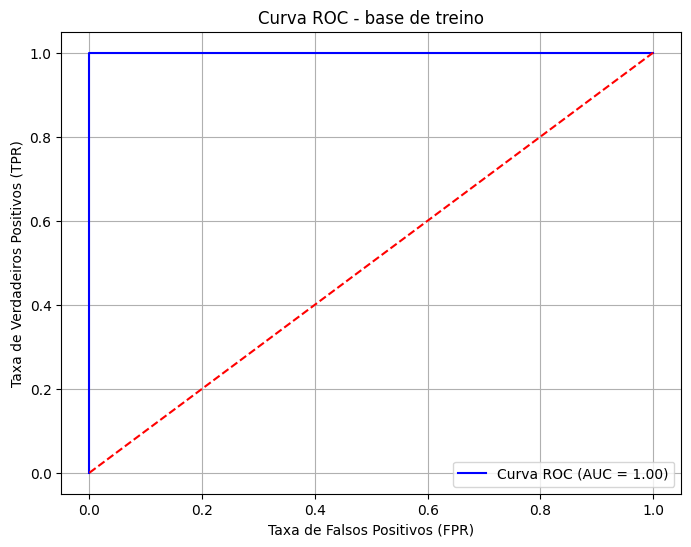


Base de teste:
A acurácia da árvore é: 100.0%
A acurácia balanceada da árvore é: 100.0%
AUC-ROC: 100.00%
GINI: 100.00%

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00        85

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



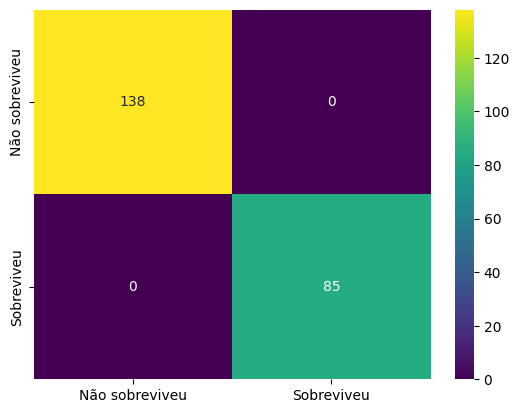

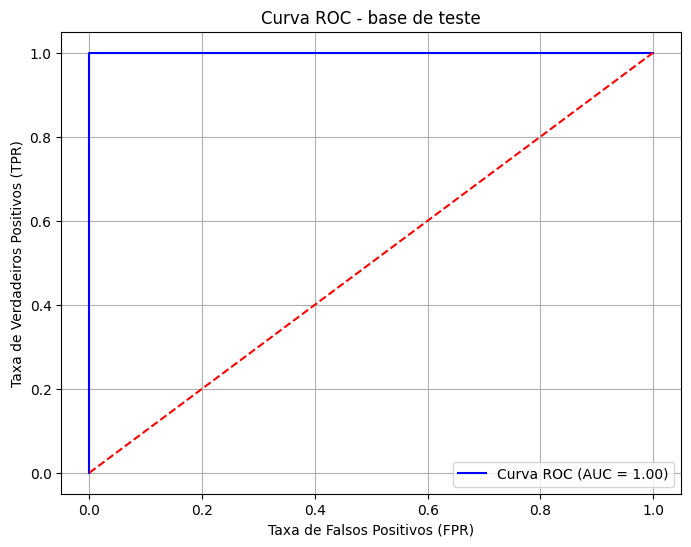

In [12]:
# Avaliando a primeira árvore.
avalia_clf(arvore1, y_train, X_train, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='treino')
avalia_clf(arvore1, y_test, X_test, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='teste')

In [14]:
# Cross Tab.
pred = arvore1.predict(X_test)
pd.crosstab(pred, y_test)

survived,0,1
row_0,,
0,138,0
1,0,85


In [16]:
# Pronto! Acurácia perfeita na base de testes...espera...
print(X_train.columns)
# O que há de errado com a árvore?


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male',
       'embarked_Q', 'embarked_S'],
      dtype='object')


In [17]:
# O erro numero 1 dos modelos perfeitos: a target no meio das features.
# Corrigindo.
variaveis.remove('survived')

In [18]:
# Refazendo as bases de treino e teste.
X = titanic[variaveis]
y=titanic[vResp]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1729)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(668, 8) (668,) (223, 8) (223,)


In [19]:
# Treinando a primeira árvore (correta agora).
arvore1 = DecisionTreeClassifier()
arvore1.fit(X_train, y_train)

DecisionTreeClassifier()


Base de treino:
A acurácia da árvore é: 99.0%
A acurácia balanceada da árvore é: 98.7%
AUC-ROC: 99.97%
GINI: 99.94%

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       411
           1       1.00      0.98      0.99       257

    accuracy                           0.99       668
   macro avg       0.99      0.99      0.99       668
weighted avg       0.99      0.99      0.99       668



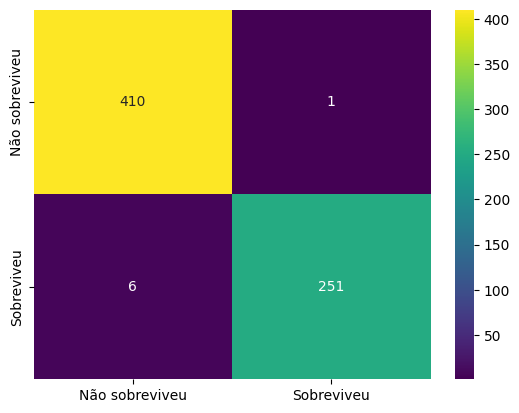

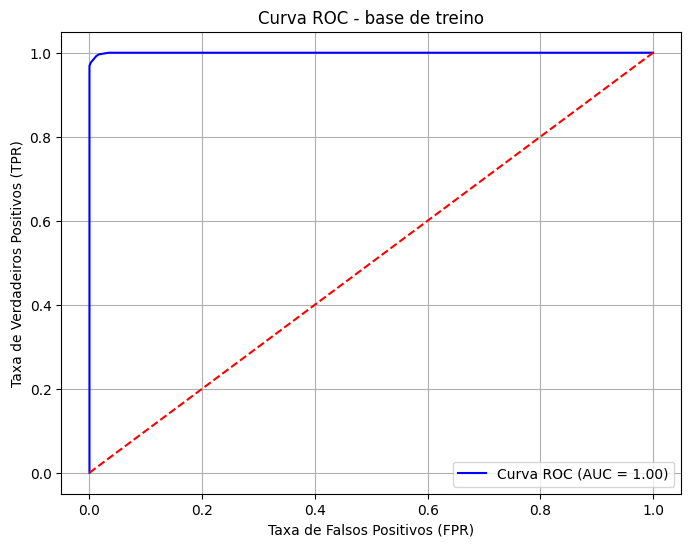


Base de teste:
A acurácia da árvore é: 77.6%
A acurácia balanceada da árvore é: 76.0%
AUC-ROC: 76.78%
GINI: 53.55%

               precision    recall  f1-score   support

           0       0.81      0.83      0.82       138
           1       0.71      0.69      0.70        85

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.78       223



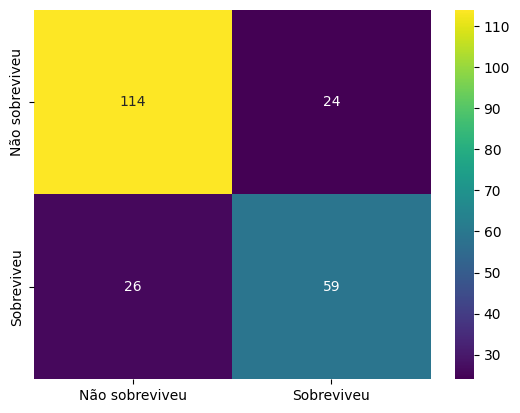

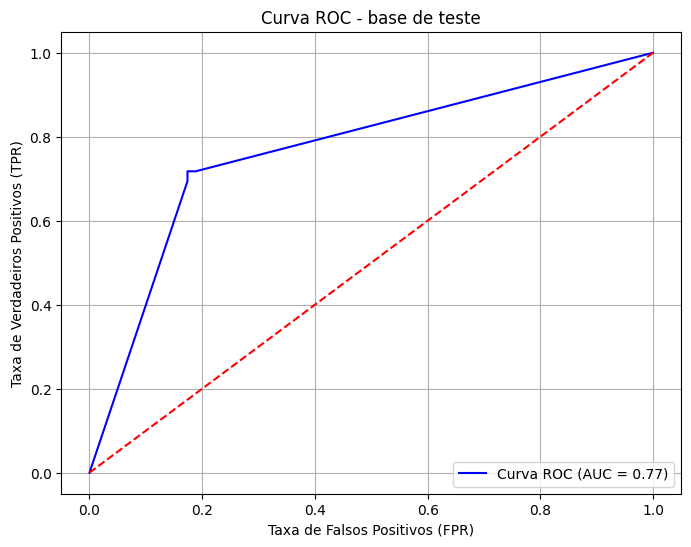

In [20]:
# Avaliando a primeira árvore (correta).
avalia_clf(arvore1, y_train, X_train, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='treino')
avalia_clf(arvore1, y_test, X_test, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='teste')

In [23]:
# CCP Path na base de treino.
path = arvore1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [24]:
# Verificar se há duplicações nos ccp_alphas.
print(len(ccp_alphas))
len(pd.Series(ccp_alphas).unique())

59


53

In [28]:
# Buscando os únicos.
ccp_alphas = pd.Series(ccp_alphas).unique()

In [30]:
#  Avaliar diferentes alfas.
ginis=[]

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train, y_train)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
    gini = auc*2-1
    ginis.append(gini)
    # Avaliar no conjunto de validação ou com validação cruzada

relatorio = pd.DataFrame({'ccp_alpha':ccp_alphas, 'gini':ginis})    
relatorio

,ccp_alpha,gini
0,0.000000,0.559420
1,0.000037,0.559420
2,0.000074,0.559420
3,0.000250,0.553964
4,0.000374,0.553964
5,0.000499,0.553964
6,0.000499,0.550043
7,0.000499,0.555328
8,0.000570,0.555328
9,0.000798,0.564024


In [32]:
# Máximo.
maximo = relatorio[relatorio.gini == relatorio.gini.max()]
ccp_max = maximo.ccp_alpha.iloc[0]
maximo

,ccp_alpha,gini
28,0.001417,0.65098
29,0.001444,0.65098


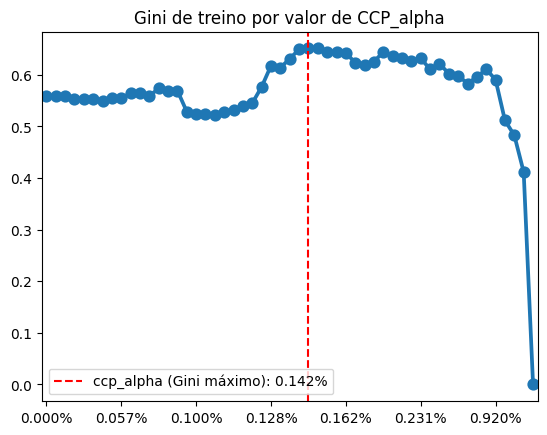

In [34]:
# Graficamente.
fig, ax = plt.subplots(1)
sns.pointplot(y=ginis, x=ccp_alphas, ax=ax)

# Configuração dos ticks.
passo = 8
x_ticks = ax.get_xticks()[::passo]
x_tick_labels = [f'{x:.3%}' for x in ccp_alphas[::passo]]
ax.set_xticks(x_ticks, x_tick_labels)

ax.set_title('Gini de treino por valor de CCP_alpha')

ax.axvline(x=maximo.index[0], color='red', linestyle='--', label=f'ccp_alpha (Gini máximo): {ccp_max:.3%}')
ax.legend()
plt.show()

In [36]:
# Instanciando o modelo.
arvore2 = DecisionTreeClassifier(ccp_alpha=ccp_max)
arvore2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0014172741473574588)


Base de treino:
A acurácia da árvore é: 93.7%
A acurácia balanceada da árvore é: 92.8%
AUC-ROC: 95.93%
GINI: 91.86%

               precision    recall  f1-score   support

           0       0.93      0.97      0.95       411
           1       0.94      0.89      0.92       257

    accuracy                           0.94       668
   macro avg       0.94      0.93      0.93       668
weighted avg       0.94      0.94      0.94       668



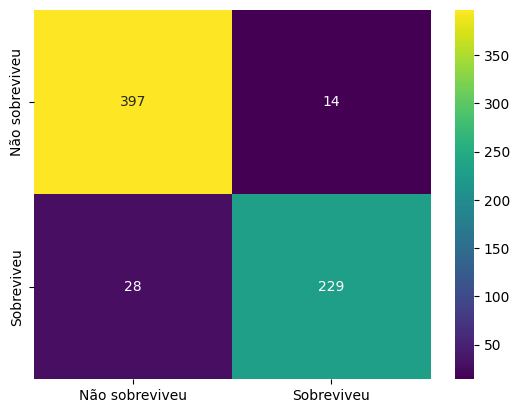

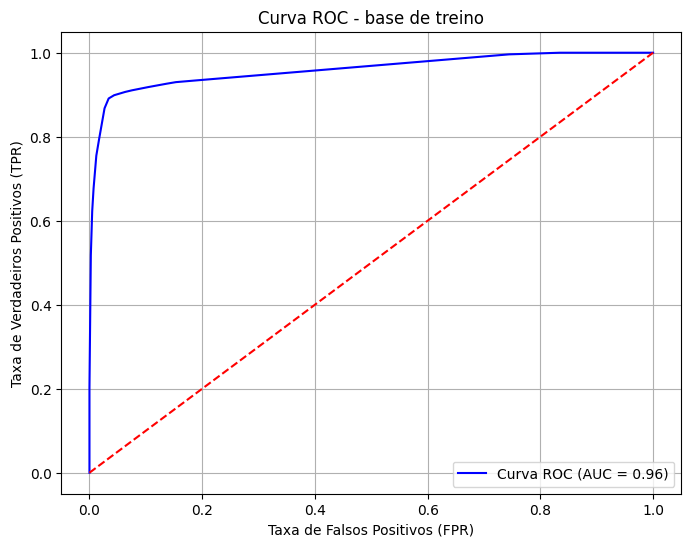


Base de teste:
A acurácia da árvore é: 81.2%
A acurácia balanceada da árvore é: 79.6%
AUC-ROC: 82.55%
GINI: 65.10%

               precision    recall  f1-score   support

           0       0.84      0.86      0.85       138
           1       0.77      0.73      0.75        85

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



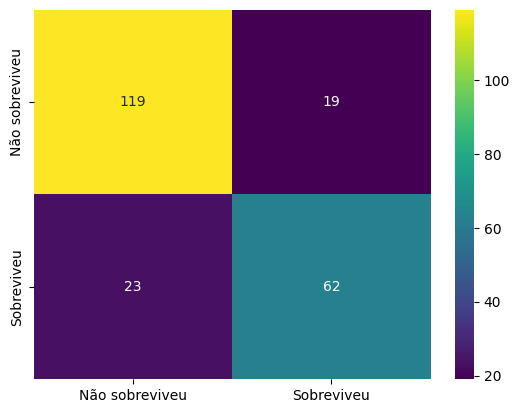

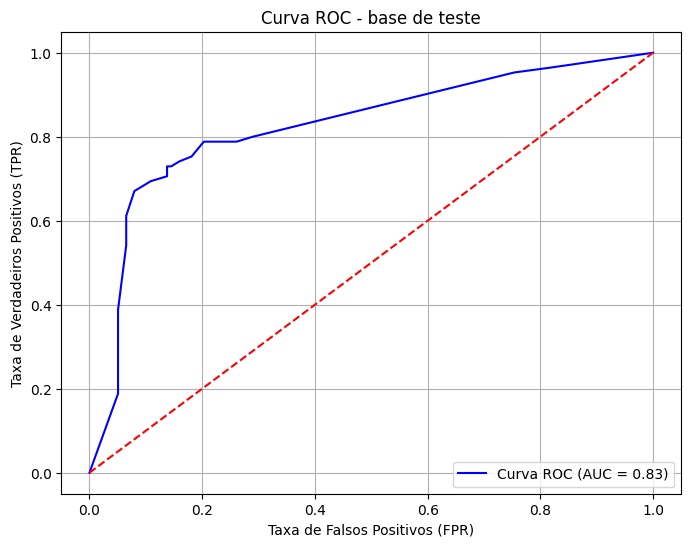

In [37]:
# Avaliando o modelo.
avalia_clf(arvore2, y_train, X_train, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='treino')
avalia_clf(arvore2, y_test, X_test, rótulos_y=['Não sobreviveu', 'Sobreviveu'],base='teste')

In [38]:
# Configurar o grid (as opções que vamos testar).
param_grid = {'ccp_alpha': ccp_alphas}
param_grid = {
    'ccp_alpha': ccp_alphas,                # Valores de poda de complexidade de custo
    'max_depth': [None, 5, 10],       # Profundidade máxima da árvore
    'min_samples_split': [2, 10],        # Número mínimo de amostras para dividir um nó
    # 'min_samples_leaf': [1, 2, 4],          # Número mínimo de amostras em uma folha
    # 'max_features': [None, 'sqrt', 'log2'], # Número máximo de features consideradas
    'criterion': ['gini', 'entropy']        # Critério de divisão
}

# Configurar a validação cruzada (CV).
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) 
# Instanciar o classificador (árvore).
clf = DecisionTreeClassifier(random_state=42)

# Instanciar o GridSearchCV com o grid, CV e classificador.
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=kf,
    scoring='roc_auc',
    return_train_score=True
)

# Executar o grid.
grid_search.fit(X_train, y_train)

# Resultados.
best_alpha = grid_search.best_params_['ccp_alpha']
best_score = grid_search.best_score_
print(f"Melhor alpha: {best_alpha}")
print(f"Acurácia média na validação cruzada: {best_score:.4f}")


Melhor alpha: 0.003962354912878935
Acurácia média na validação cruzada: 0.8749


In [39]:
# Resultados.
resultados = pd.DataFrame(grid_search.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006544,0.004046,0.006720,0.003309,0.0,gini,NaN,2,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.692857,...,0.999860,0.999661,0.999807,0.999661,0.999813,0.999661,0.999854,0.999662,0.999743,0.000085
1,0.004266,0.000767,0.003705,0.000773,0.0,gini,NaN,10,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.745238,...,0.981438,0.985042,0.984205,0.979238,0.983515,0.979847,0.981005,0.984186,0.982621,0.002067
2,0.004480,0.001020,0.004244,0.001521,0.0,gini,5.0,2,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.766190,...,0.924669,0.924137,0.924389,0.926366,0.926623,0.928267,0.928145,0.920212,0.925056,0.002867
3,0.008063,0.005833,0.007529,0.004920,0.0,gini,5.0,10,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.766190,...,0.920914,0.923289,0.924389,0.923663,0.925693,0.926582,0.927231,0.919129,0.923768,0.003042
4,0.006288,0.003948,0.006009,0.003933,0.0,gini,10.0,2,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.687619,...,0.986264,0.984597,0.990137,0.987890,0.985123,0.992793,0.991612,0.991455,0.988962,0.003232


Análise do Grid

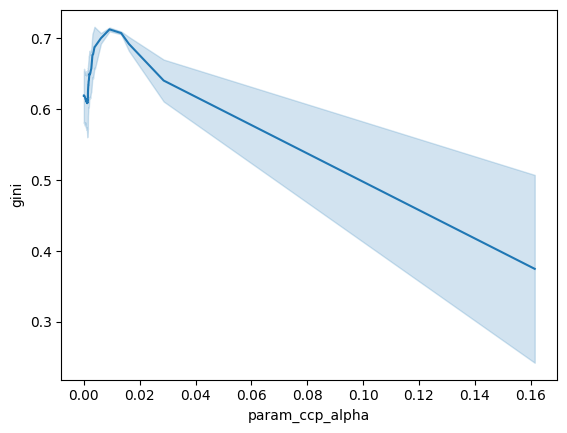

In [41]:
# Avaliação do gini na base de cross validation por ccp_alpha.
resultados['gini'] = resultados.mean_test_score*2-1
sns.lineplot(data=resultados, x='param_ccp_alpha', y='gini')
plt.show()

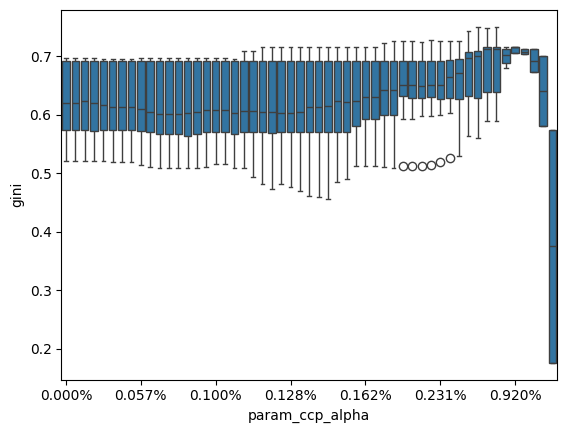

In [42]:
#  Boxplot do gini na base de CV por ccp_alpha.
# Aqui estou interessado em avaliar máximos e mínimos.
fig, ax = plt.subplots(1)

resultados['gini'] = resultados.mean_test_score*2-1
sns.boxplot(data=resultados, 
             x=resultados['param_ccp_alpha'].astype('str'), 
             y='gini',
             ax=ax)
passo = 8
x_ticks = ax.get_xticks()[::passo]
x_tick_labels = [f'{x:.3%}' for x in ccp_alphas[::passo]]
ax.set_xticks(x_ticks, x_tick_labels)
plt.show()

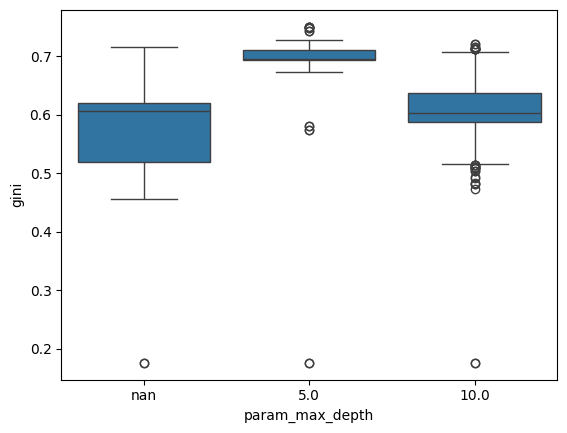

In [43]:
# Gini por profundidade máxima.
resultados['gini'] = resultados.mean_test_score*2-1
sns.boxplot(data=resultados, x=resultados['param_max_depth'].astype('str'), y='gini')
plt.show()

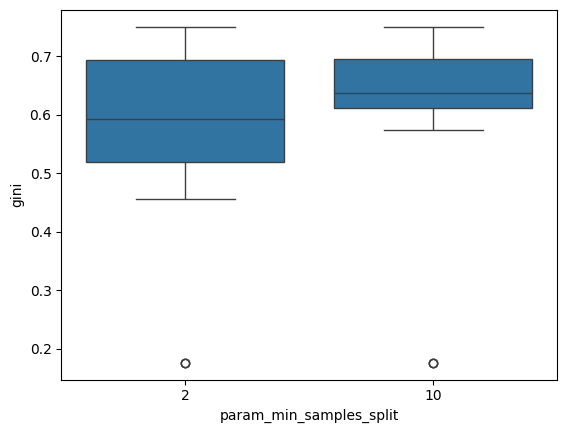

In [44]:
# Gini por param_min_samples_split.
resultados['gini'] = resultados.mean_test_score*2-1
sns.boxplot(data=resultados, x=resultados['param_min_samples_split'].astype('str'), y='gini')
plt.show()

In [45]:
# Treinar o modelo final com o melhor alpha.
final_clf = grid_search.best_estimator_
prob = final_clf.predict_proba(X_test)[:,1]

# Avaliar na base de teste.
test_score = final_clf.score(X_test, y_test)
auc = roc_auc_score(y_test, prob)
gini = auc*2-1
print(f"Acurácia na base de teste: {test_score:.4f}")
print(f"Gini na base de teste: {gini:.4f}")

Acurácia na base de teste: 0.7892
Gini na base de teste: 0.5957


In [47]:
# Base de teste.
df_test = X_test.copy()
df_test['y'] = y_test
df_test['p'] = prob
df_test.head(3)

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,y,p
746,3,16.0,1,1,20.2500,True,False,True,0,0.090062
40,3,40.0,1,0,9.4750,False,False,True,0,0.000000
500,3,17.0,0,0,8.6625,True,False,True,0,0.090062


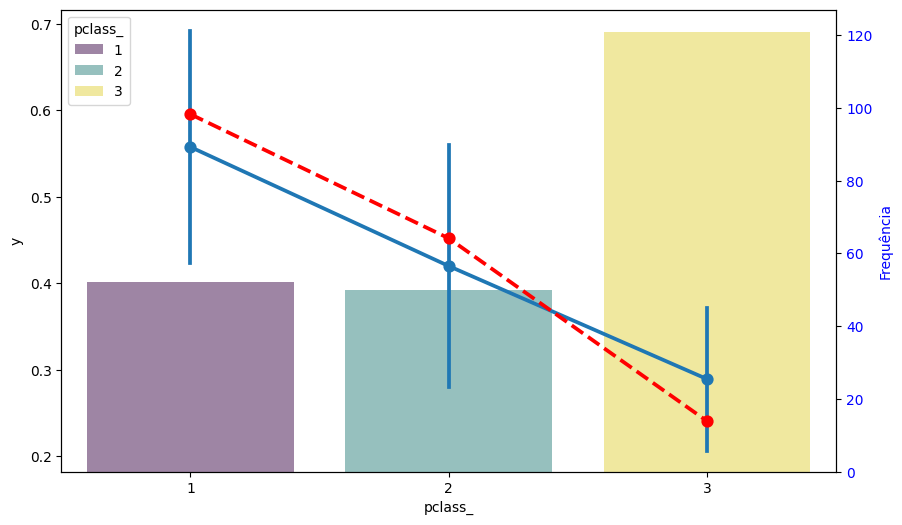

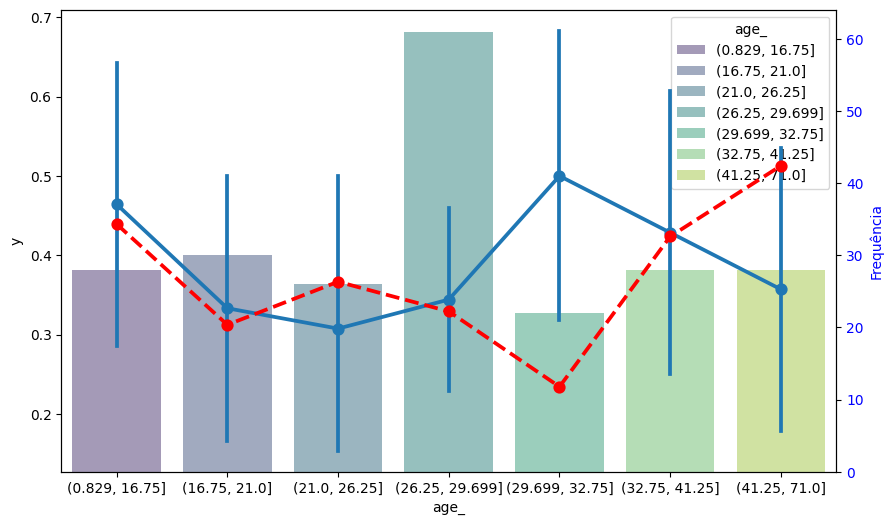

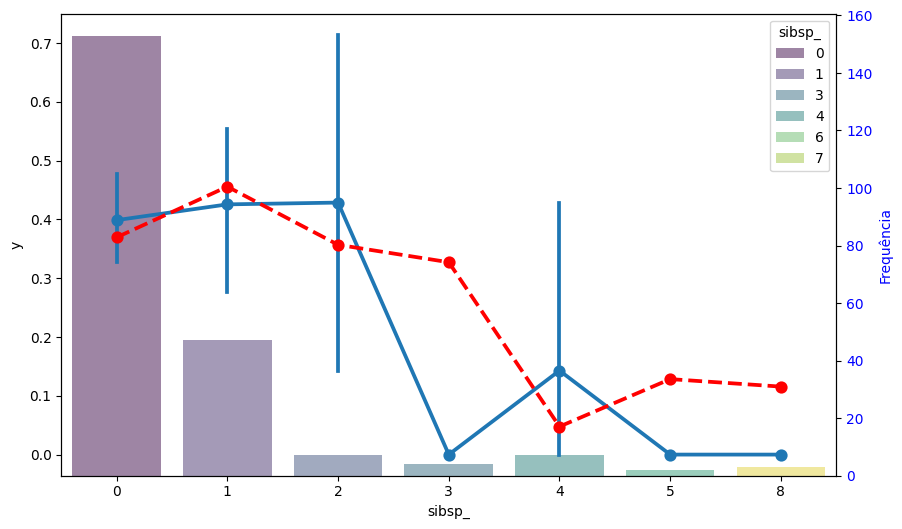

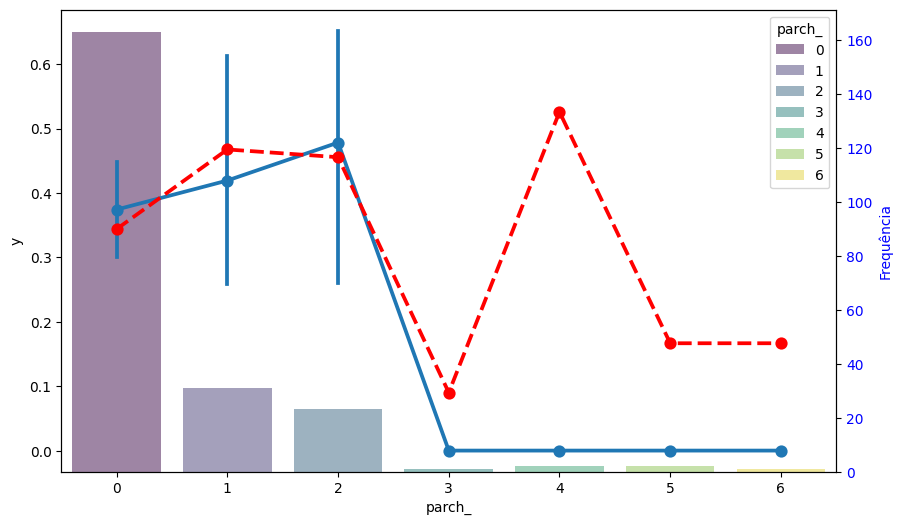

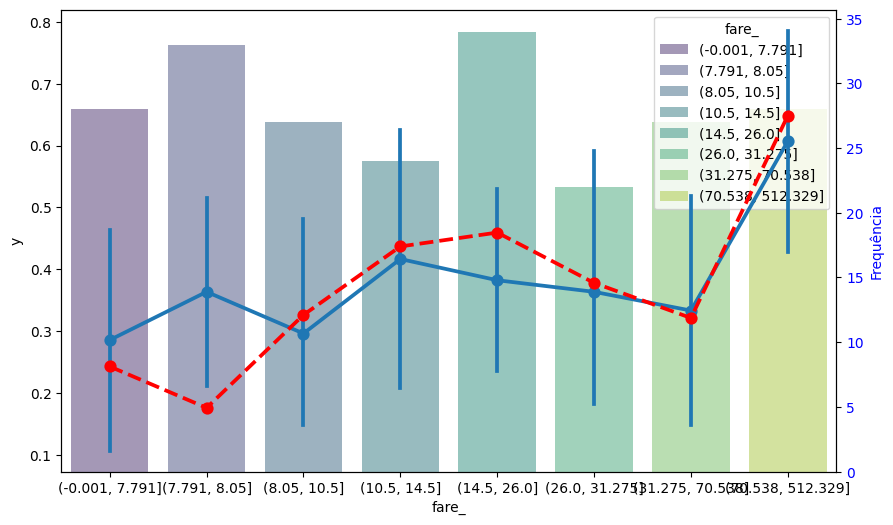

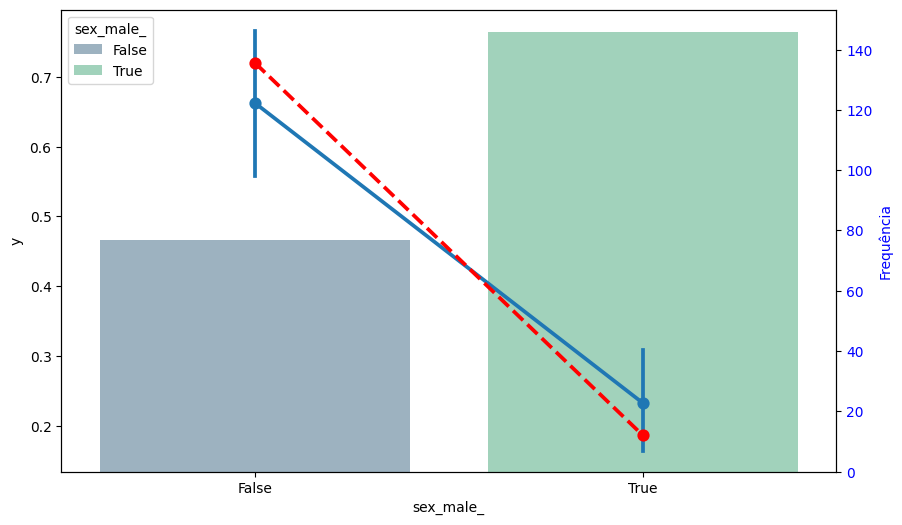

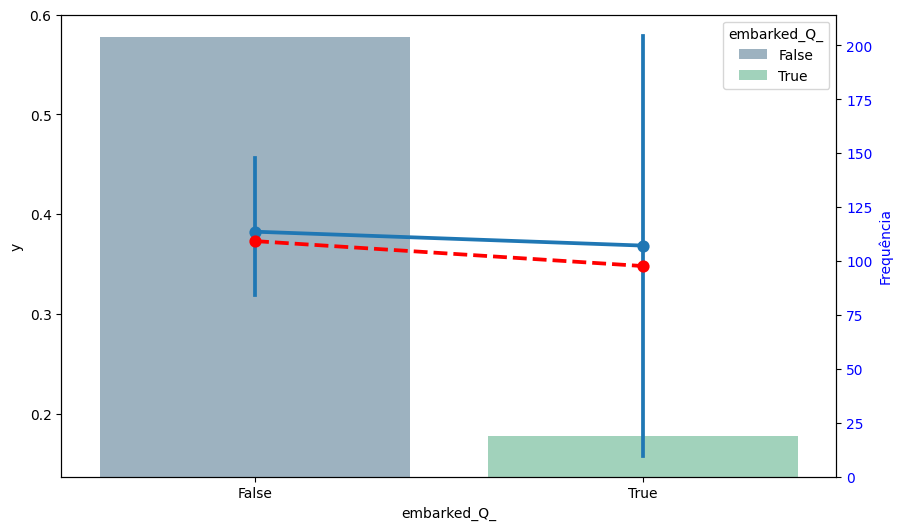

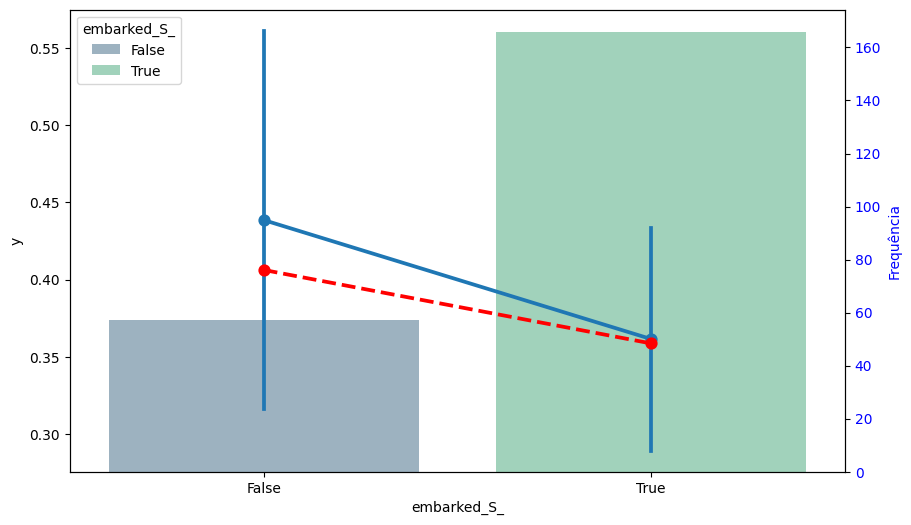

In [48]:
# Avaliando a resposta do modelo para cada variável.
for var in X_test.columns:
    diagnóstico(df_test, var, vresp='y', pred='p', max_classes=8)

In [49]:
# Salvar o modelo final em um arquivo usando Pickle.
with open('arvore_final.pkl', 'wb') as file:
    pickle.dump(final_clf, file)